# false positive rate

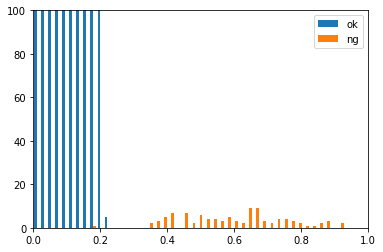

In [65]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# μ, σ, N
ok = np.random.normal(0.1, 0.03, 100000)
ng = np.random.normal(0.6, 0.15, 100)

trues = np.append( np.zeros(100000), np.ones(100) )
preds = np.append(ok,ng)

th = 0.2
preds_bin = []
for p in preds:
    if p < th:
        preds_bin.append(0)
    else:
        preds_bin.append(1)

plt.hist([ok, ng], bins=50, label=["ok","ng"])
plt.xlim((0, 1))

plt.ylim((0, 100)) 
plt.legend(loc='upper right')
plt.show()


# # plt.hist(x, bins=50)
# # filename="hist.png"
# # plt.savefig(filename)
# # plt.show()

# # plt.hist(x, bins=100)
# # filename="hist.png"
# # plt.savefig(filename)
# # plt.show()

# false positive rate, 謎の過検出率問題

|  | pred. NG | pred. OK |
| :---: | :---: | :---: |
| true NG | TP | FN |
| true OK | FP | TN |

$$
FPR = \frac{TP}{FP+TN=N_{OK} } \\
謎の過検出率 = \frac{TP}{N}
$$

In [77]:
from sklearn.metrics import confusion_matrix
tp, fn ,fp,  tn = confusion_matrix( trues, preds_bin,labels=[1,0]).ravel()
print(tp,  fn ,fp, tn)

print(confusion_matrix(trues, preds_bin,labels=[1,0]) )
FPR = tp / (fp + tn)
print(FPR)

99 1 36 99964
[[   99     1]
 [   36 99964]]
0.00099


# Bayes' theorem

感度とは、臨床検査の性格を決める指標の1つで、ある検査について「陽性と判定されるべきものを正しく陽性と判定する確率」として定義される値で
特異度（とくいど）とは、臨床検査の性格を決める指標の1つで、ある検査について「陰性のものを正しく陰性と判定する確率」

1 : 9999
OK,NGが製造される確率
P(OK) =  9999 / 10000
P(NG) =  1 / 10000

99%の感度
P( pred NG | OK) =  (9999/ 10000) *  (1/ 100)
P( pred NG | NG) = 

In [82]:
P_predNG_OK = (9999/ 10000) *  (1/ 100)
P_predNG_NG = (1/ 10000) *  (99/ 100)

print(P_predNG_OK*100, P_predNG_NG*100)

0.9999000000000001 0.0099


In [84]:
print( 0.9999000000000001/ ( 0.9999000000000001+ 0.0099 ) )
print( 0.0099 / ( 0.9999000000000001+ 0.0099 ) )

0.9901960784313727
0.00980392156862745


NG→NG 0.99%
100個NGと判定されて本当にNGの場合は1/100個

# Cという病気の罹患率の例

Cという病気の罹患率0.1%
95%の確率で陽性と診断できる.  
2%の確率で陽性と誤診される．  
検査で陽性と診断された場合，Cに罹患している確率．

|  | 陽性 | 陰性 |
| :---: | :---: | :---: |
| 罹患 | 0.95 | 0.05 |
| 未罹患 | 0.02 | 0.98 |

P( 罹患 ) = 1 / 1000  
P( 未罹患 ) =  999 / 1000

陽性と判定された場合，  
P( 陽性 | 罹患 ) = 0.95 * ( 1 / 1000 )
P( 陽性 | 未罹患) = 0.05 * ( 999 / 1000)

陽性と判定された人の比率を考える.  
P( 陽性 | 罹患 ) :  P( 陽性 | 未罹患 ) = 95 / 100000 : 5 * 999  / 100000  
=95 : 4995

陽性と判定されて，実際に罹患している割合
95/4995 = 1.9%

#  未検出率0%, 過検出率1%未満の例

|  | pred. NG | pred. OK |
| :---: | :---: | :---: |
| true NG | TP | FN |
| true OK | FP | TN |

|  | pred. NG | pred. OK |
| :---: | :---: | :---: |
| true NG | 1.0 | 0 |
| true OK | 0.01 | 99.9 |

実際の1/1000でNG発生  

P( true NG ) = 1 / 1000  
P( true OK ) =  999 / 1000

陽性と判定された場合，  
P( pred NG | tue NG ) = 1.0 * ( 1 / 1000 )
P( pred NG | true OK ) = 0.01 * ( 999 / 1000)

陽性と判定された人の比率を考える.  
P( 陽性 | 罹患 ) :  P( 陽性 | 未罹患 ) = 100 / 100000 : 1 * 999 / 100000  
= 100 : 999

陽性と判定されて，実際に罹患している割合
100 / (100 + 999 ) =  9.09%

つまり，NGと判定したもののうち, 100個中91個はOK

# 1000個製造してNG１個  
# 謎検出率の場合

未検出率，過検出率1%

$$
謎の過検出率 = \frac{TP}{N}
$$

1000個製造してNG１個  
未検出率，過検出率1%

|  | pred. NG | pred. OK |
| :---: | :---: | :---: |
| true NG | 1 | 0  |
| true OK | 10 | 989 |

# Falise Positive Rate

1000個製造してNG１個  
未検出率，過検出率1%

$$
FPR = \frac{TP}{FP+TN=N_{OK} } \\
$$

|  | pred. NG | pred. OK |
| :---: | :---: | :---: |
| true NG | 1 | 0  |
| true OK | 9.9 | 990.1 |

# NG1個はまずいんじゃね？
# OK : NG = 9000 : 1000

# 謎検出率の場合

$$
謎の過検出率 = \frac{TP}{N}
$$

1000個製造してNG１個  
未検出率，過検出率1%

|  | pred. NG | pred. OK |
| :---: | :---: | :---: |
| true NG | 1000 | 0  |
| true OK | 100 | 8900 |



# Falise Positive Rate

1000個製造してNG１個  
未検出率，過検出率1%

$$
FPR = \frac{TP}{FP+TN=N_{OK} } \\
$$

|  | pred. NG | pred. OK |
| :---: | :---: | :---: |
| true NG | 1000 | 0  |
| true OK | 90 | 8910  |

In [ ]:
a + b = 9000
a / (a+b) = 1
a = a + a

# 現状の検査精度
# 疲れたので保留

|  | pred. NG | pred. OK |
| :---: | :---: | :---: |
| true NG |  |  |
| true OK |  |  |